In [5]:
!pip install numpy==1.24.4

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
     ------- -------------------------------- 2.1/10.9 MB 14.7 MB/s eta 0:00:01
     --------------------- ------------------ 5.8/10.9 MB 14.7 MB/s eta 0:00:01
     ------------------------------ --------- 8.4/10.9 MB 14.4 MB/s eta 0:00:01
     --------------------------------------- 10.9/10.9 MB 13.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^^^^^

In [6]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
import pandas as pd

# Load the childcare costs data
childcare_data = pd.read_csv('childcare_costs.csv')

# Load the county information data
county_data = pd.read_csv('counties.csv')

# Display the first few rows of each dataset
print(childcare_data.head())
print(county_data.head())

   county_fips_code  study_year  ...  mfcc_toddler  mfcc_preschool
0              1001        2008  ...         83.45           81.40
1              1001        2009  ...         87.39           85.68
2              1001        2010  ...         91.33           89.96
3              1001        2011  ...         95.28           94.25
4              1001        2012  ...         99.22           98.53

[5 rows x 61 columns]
   county_fips_code     county_name state_name state_abbreviation
0              1001  Autauga County    Alabama                 AL
1              1003  Baldwin County    Alabama                 AL
2              1005  Barbour County    Alabama                 AL
3              1007     Bibb County    Alabama                 AL
4              1009   Blount County    Alabama                 AL


## Merge datasets

In [18]:
# Assuming 'county_fips_code' is the common column between the two datasets
merged_data = pd.merge(childcare_data, county_data, how='left', on='county_fips_code')

# Display the first few rows of the merged dataset
print(merged_data.head())

   county_fips_code  study_year  ...  state_name  state_abbreviation
0              1001        2008  ...     Alabama                  AL
1              1001        2009  ...     Alabama                  AL
2              1001        2010  ...     Alabama                  AL
3              1001        2011  ...     Alabama                  AL
4              1001        2012  ...     Alabama                  AL

[5 rows x 64 columns]


In [20]:
# Check the column names of the merged dataset
print(merged_data.columns)

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool',
       'county_name', 'state_n

In [22]:
# Create the 'county_time' column by combining 'county_fips_code' and 'study_year'
merged_data['county_time'] = merged_data['county_fips_code'].astype(str) + '_' + merged_data['study_year'].astype(str)

# Now you can rerun the regression with 'county_time' included
formula = 'mc_infant ~ mhi_2018 + flfpr_20to64 + C(state_name) + C(study_year)'

# Fit the OLS regression model
model = smf.ols(formula, data=merged_data).fit()

# Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mc_infant   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1459.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        00:52:25   Log-Likelihood:            -1.0915e+05
No. Observations:               23593   AIC:                         2.184e+05
Df Residuals:                   23532   BIC:                         2.189e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Understand multicollinearity and relationships between variables

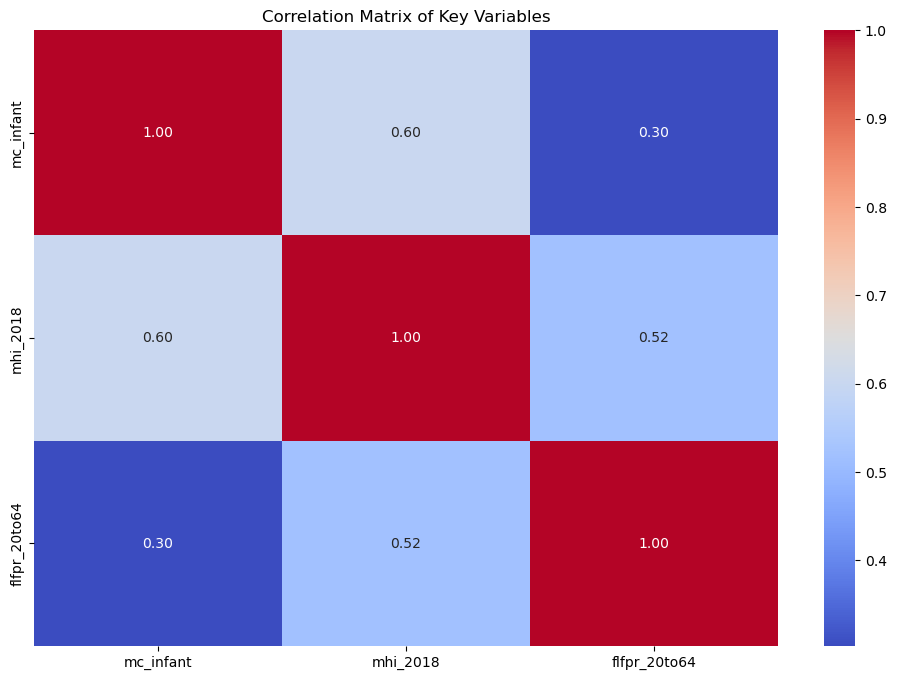

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
corr = merged_data[['mc_infant', 'mhi_2018', 'flfpr_20to64']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

### Visualize cost distribution and outliers across states.

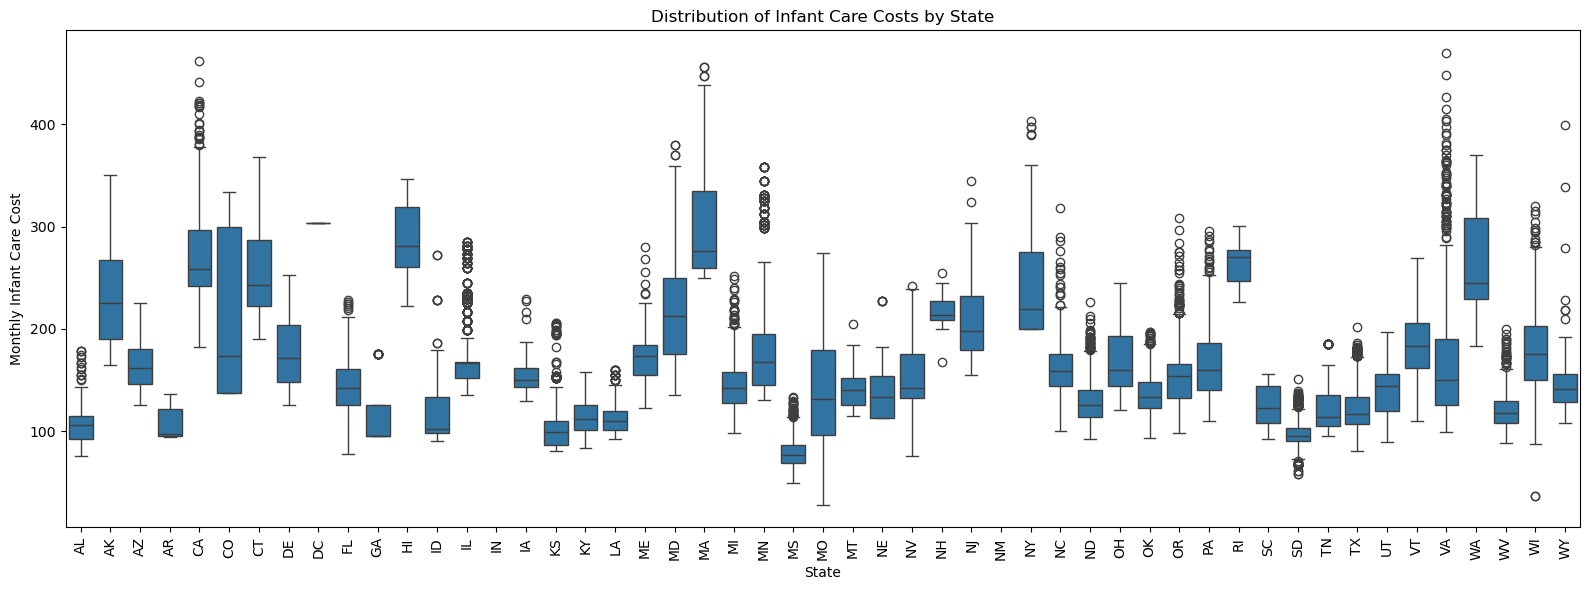

In [28]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='state_abbreviation', y='mc_infant', data=merged_data)
plt.xticks(rotation=90)
plt.title('Distribution of Infant Care Costs by State')
plt.xlabel('State')
plt.ylabel('Monthly Infant Care Cost')
plt.tight_layout()
plt.show()

### Cost evolution over years.

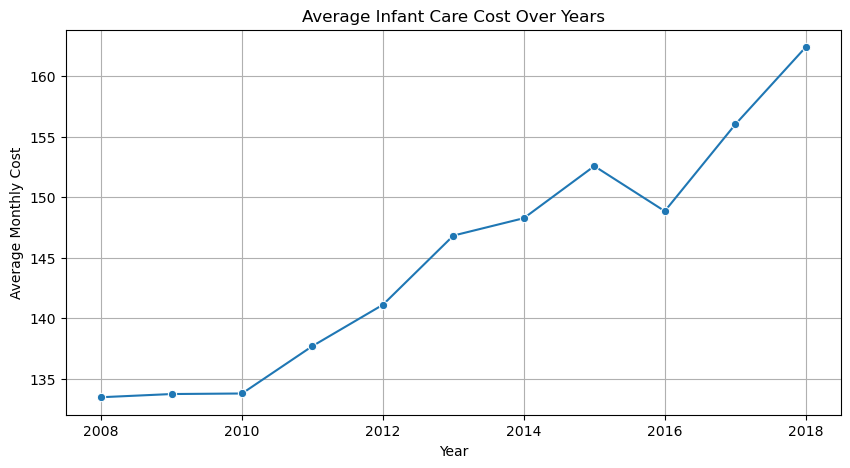

In [31]:
avg_cost_per_year = merged_data.groupby('study_year')['mc_infant'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_cost_per_year, x='study_year', y='mc_infant', marker='o')
plt.title('Average Infant Care Cost Over Years')
plt.xlabel('Year')
plt.ylabel('Average Monthly Cost')
plt.grid(True)
plt.show()

In [33]:
X = merged_data[['mhi_2018', 'flfpr_20to64'] + [col for col in merged_data.columns if 'C(state_name)' in col or 'C(study_year)' in col]]

# Add constant to the independent variables for VIF calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif_data)

        feature        VIF
0         const  85.134853
1      mhi_2018   1.371148
2  flfpr_20to64   1.371148


The VIF values for the predictors (mhi_2018 and flfpr_20to64) indicate that multicollinearity is not a concern.

In [36]:
# Check for missing data in the predictors and dependent variable
print(merged_data[['mhi_2018', 'flfpr_20to64']].isnull().sum())
print(merged_data['mfcc_preschool'].isnull().sum())  # Replace with your actual dependent variable column name

mhi_2018        0
flfpr_20to64    0
dtype: int64
11184


In [40]:
from statsmodels.stats.diagnostic import het_breuschpagan#
# Drop rows with missing values in the dependent variable
merged_data_clean = merged_data.dropna(subset=['mfcc_preschool'])

# Refit the model on the cleaned data
X_clean = sm.add_constant(merged_data_clean[['mhi_2018', 'flfpr_20to64']])
y_clean = merged_data_clean['mfcc_preschool']

# Fit the model again
model_clean = sm.OLS(y_clean, X_clean).fit()

# Get the residuals and predicted values from the refitted model
residuals_clean = model_clean.resid
predicted_clean = model_clean.fittedvalues

# Perform the Breusch-Pagan test for heteroscedasticity
bp_test_clean = het_breuschpagan(residuals_clean, X_clean)
print("Breusch-Pagan test results:", bp_test_clean)


Breusch-Pagan test results: (1539.4645211110962, 0.0, 823.8748836781301, 0.0)



# **Key Findings:**

1. Intercept: The intercept of the model is significant (p < 0.001), meaning that there is a baseline childcare cost when all other variables are zero

2. State-Level Effects: Many state dummies (e.g., California, New York, Massachusetts) show significant coefficients, meaning that the state significantly affects childcare costs. For instance, California shows a positive coefficient of 132.71, suggesting higher costs compared to the baseline state.

3. Study Year Effects: The study year dummies (e.g., 2010, 2011, 2012, etc.) show significant increases in childcare costs over time, indicating that the cost of childcare has been rising over the years.

4. Median Household Income (mhi_2018): The positive coefficient of 0.0016 suggests that as median household income increases, the cost of childcare also increases, although this relationship is relatively small in magnitude.

5. Female Labor Force Participation Rate (flfpr_20to64): The positive coefficient indicates a positive relationship between female labor force participation and childcare costs, meaning that higher participation rates tend to correlate with higher childcare costs.


### Check for outliers

In [44]:
# Identify outliers in FLFPR
Q1 = merged_data['flfpr_20to64'].quantile(0.25)
Q3 = merged_data['flfpr_20to64'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_data[(merged_data['flfpr_20to64'] < lower_bound) | (merged_data['flfpr_20to64'] > upper_bound)]
print(f"Outliers in FLFPR: \n{outliers}")

Outliers in FLFPR: 
       county_fips_code  study_year  ...  state_abbreviation  county_time
132                1025        2008  ...                  AL    1025_2008
142                1025        2018  ...                  AL    1025_2018
351                1063        2018  ...                  AL    1063_2018
593                1107        2018  ...                  AL    1107_2018
717                1131        2010  ...                  AL    1131_2010
...                 ...         ...  ...                 ...          ...
33519             54109        2016  ...                  WV   54109_2016
33520             54109        2017  ...                  WV   54109_2017
33521             54109        2018  ...                  WV   54109_2018
34466             56027        2017  ...                  WY   56027_2017
34467             56027        2018  ...                  WY   56027_2018

[426 rows x 65 columns]


## Address outliers by

Removing or cap extreme outliers and log transformations

In [50]:
import numpy as np
# Cap values at the 1st and 99th percentiles
lower_cap = merged_data['flfpr_20to64'].quantile(0.01)
upper_cap = merged_data['flfpr_20to64'].quantile(0.99)

merged_data['flfpr_20to64'] = merged_data['flfpr_20to64'].clip(lower=lower_cap, upper=upper_cap)

# Log transformation (after adding a small constant to avoid log(0))
merged_data['flfpr_20to64_log'] = np.log(merged_data['flfpr_20to64'] + 1)

## Univariate Analysis of FLFPR (Female Labor Force Participation Rate )

count    34567.000000
mean        70.104135
std          7.511805
min         48.800000
25%         65.100000
50%         70.600000
75%         75.500000
max         85.400000
Name: flfpr_20to64, dtype: float64
count    34567.000000
mean         4.258331
std          0.109117
min          3.908015
25%          4.191169
50%          4.271095
75%          4.337291
max          4.458988
Name: flfpr_20to64_log, dtype: float64


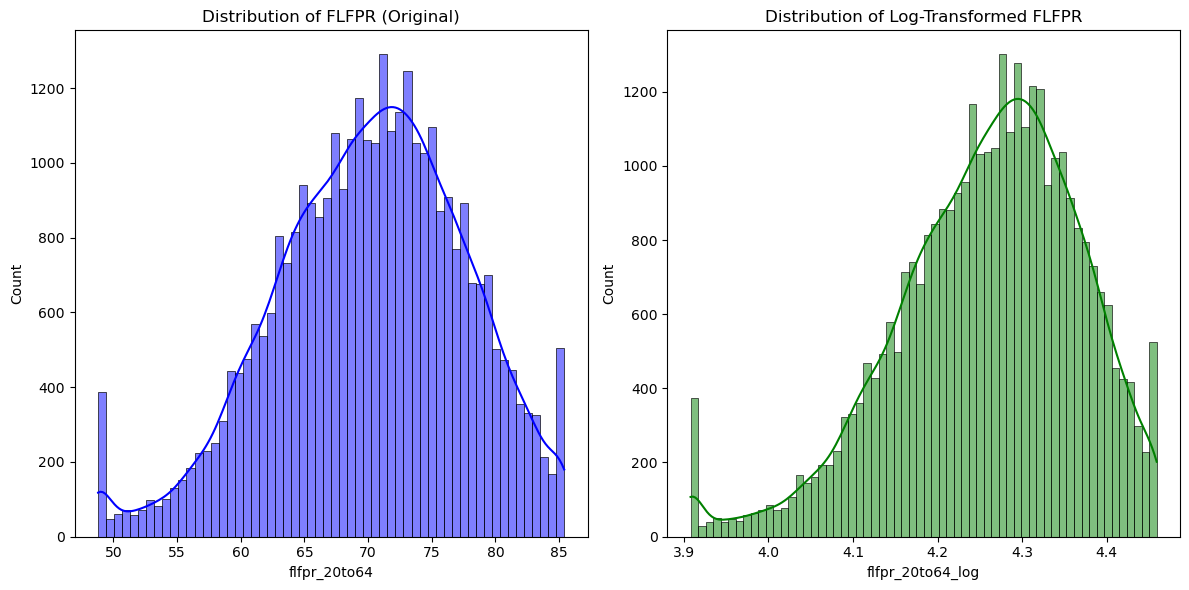

In [53]:
# Check summary statistics
print(merged_data['flfpr_20to64'].describe())
print(merged_data['flfpr_20to64_log'].describe())

# Visualize the distribution before and after transformation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original FLFPR Distribution
plt.subplot(1, 2, 1)
sns.histplot(merged_data['flfpr_20to64'], kde=True, color='blue')
plt.title("Distribution of FLFPR (Original)")

# Log-transformed FLFPR Distribution
plt.subplot(1, 2, 2)
sns.histplot(merged_data['flfpr_20to64_log'], kde=True, color='green')
plt.title("Distribution of Log-Transformed FLFPR")

plt.tight_layout()
plt.show()

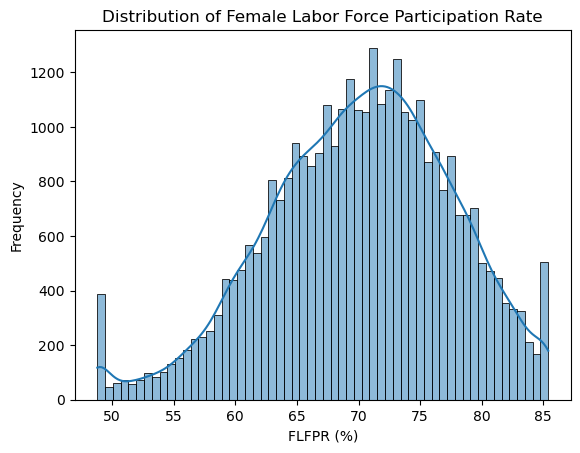

In [54]:
sns.histplot(merged_data['flfpr_20to64'], kde=True)
plt.title('Distribution of Female Labor Force Participation Rate')
plt.xlabel('FLFPR (%)')
plt.ylabel('Frequency')
plt.show()

In [55]:
# Correlation with target variable (assuming target is 'childcare_cost')
print(merged_data[['flfpr_20to64', 'flfpr_20to64_log', 'mfcc_preschool']].corr())

                  flfpr_20to64  flfpr_20to64_log  mfcc_preschool
flfpr_20to64          1.000000          0.997128        0.296248
flfpr_20to64_log      0.997128          1.000000        0.296250
mfcc_preschool        0.296248          0.296250        1.000000


### Analyzing VIF after log transformations

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the independent variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        feature        VIF
0         const  85.134853
1      mhi_2018   1.371148
2  flfpr_20to64   1.371148


### Model eveluation

In [63]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Build your prediction DataFrame with exactly the columns the model needs:
X_pred = merged_data[['mhi_2018', 'flfpr_20to64', 'state_name', 'study_year']]

# 2. Drop any rows where the target or any of these predictors is null
eval_df = merged_data.dropna(subset=['mc_infant', 'mhi_2018', 'flfpr_20to64', 'state_name', 'study_year']).copy()

# 3. Extract X and y from that cleaned frame
X_clean = eval_df[['mhi_2018', 'flfpr_20to64', 'state_name', 'study_year']]
y_true = eval_df['mc_infant']

# 4. Let Patsy/statsmodels re‑encode the categories exactly as before
y_pred = model.predict(X_clean)

# 5. Now you can safely compute metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)

print(f"Mean Squared Error:   {mse:.2f}")
print(f"Mean Absolute Error:  {mae:.2f}")
print(f"R-squared:            {r2:.4f}")

Mean Squared Error:   610.70
Mean Absolute Error:  17.49
R-squared:            0.7882


### Top 10 Most Expensive States for Infant Care

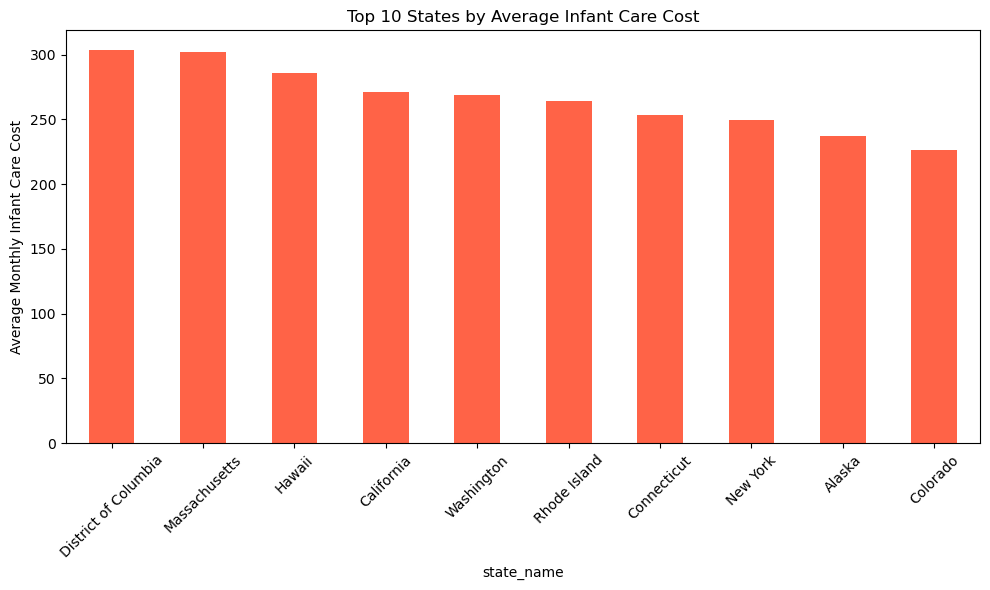

In [66]:
top_states = merged_data.groupby('state_name')['mc_infant'].mean().sort_values(ascending=False).head(10)

top_states.plot(kind='bar', color='tomato', figsize=(10, 6))
plt.title('Top 10 States by Average Infant Care Cost')
plt.ylabel('Average Monthly Infant Care Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Income Drives Care Costs**:
Higher median household income is significantly associated with higher infant care costs—suggesting that wealthier areas have higher-priced services due to cost of living
  
  **Policy**: Regional income-based subsidies are needed.

2. **Female Labor Participation Boosts Demand:**
Areas with more working women show higher care costs, indicating increased demand for childcare.


3. **Costs Vary Greatly by State:**
EDA shows stark interstate differences in care costs

  **Policy**: State-level customization is essential—federal one-size-fits-all won’t work.

4. **Multicollinearity Not a Major Issue**
Correlation analysis shows predictors are not strongly collinear, supporting model validity.

In [75]:
import pandas as pd
import plotly.express as px

# US state name → abbreviation mapping
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

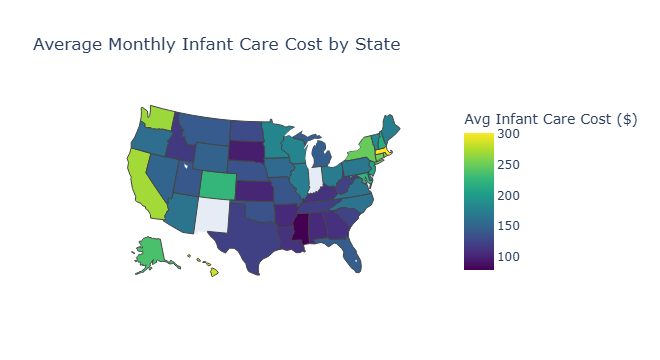

In [79]:
# 1. Create the state abbreviation column
map_df = merged_data.dropna(subset=['mc_infant', 'state_name']).copy()
map_df["state_abbrev"] = map_df["state_name"].map(us_state_abbrev)

# 2. Group by abbreviation to get average cost
state_avg = map_df.groupby("state_abbrev")["mc_infant"].mean().reset_index()
state_avg.columns = ["state", "avg_mc_infant"]

# 3. Plot the choropleth
fig = px.choropleth(
    state_avg,
    locations="state",
    locationmode="USA-states",
    color="avg_mc_infant",
    color_continuous_scale="Viridis",
    scope="usa",
    labels={"avg_mc_infant": "Avg Infant Care Cost ($)"},
    title="Average Monthly Infant Care Cost by State"
)

fig.show()

Mean Squared Error:   610.90
Mean Absolute Error:  17.49
R-squared:            0.7881


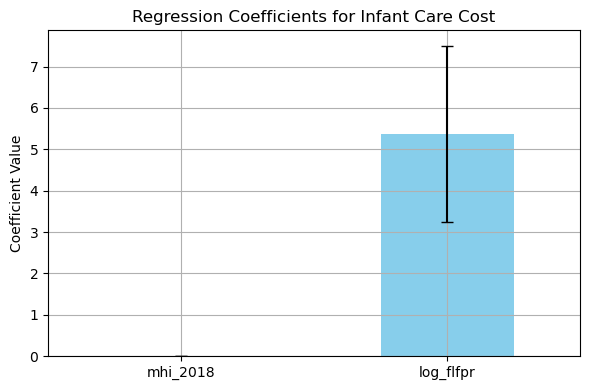

In [88]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Step 1: Log-transform FLFPR
merged_data["log_flfpr"] = np.log(merged_data["flfpr_20to64"])

# Step 2: Drop missing values used in model
reg_df = merged_data.dropna(subset=["mc_infant", "mhi_2018", "log_flfpr", "state_name", "study_year"])

# Step 3: Run regression with state and year fixed effects
model = smf.ols("mc_infant ~ mhi_2018 + log_flfpr + C(state_name) + C(study_year)", data=reg_df).fit(cov_type='HC3')

# Step 4: Print metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_clean = reg_df[["mhi_2018", "log_flfpr", "state_name", "study_year"]]
y_true = reg_df["mc_infant"]
y_pred = model.predict(X_clean)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error:   {mse:.2f}")
print(f"Mean Absolute Error:  {mae:.2f}")
print(f"R-squared:            {r2:.4f}")

# Step 5: Plot coefficients of interest
coef = model.params[["mhi_2018", "log_flfpr"]]
err = model.bse[["mhi_2018", "log_flfpr"]]

plt.figure(figsize=(6, 4))
coef.plot(kind='bar', yerr=err, capsize=4, color='skyblue')
plt.title("Regression Coefficients for Infant Care Cost")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


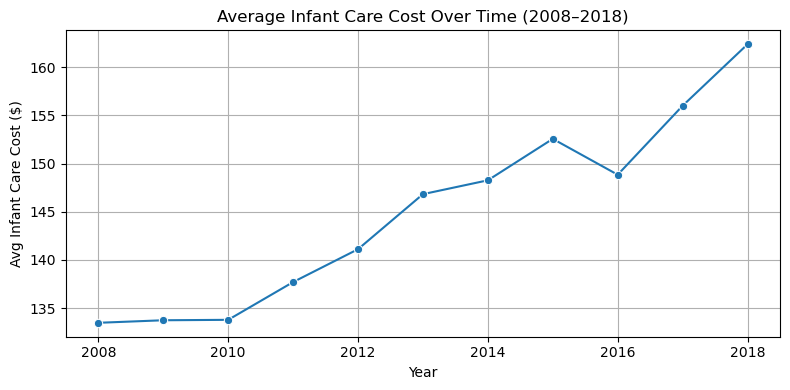

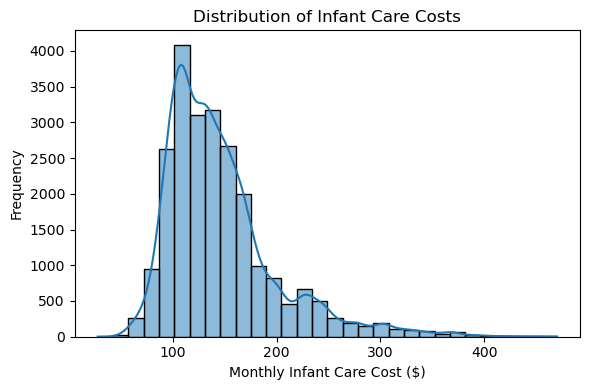

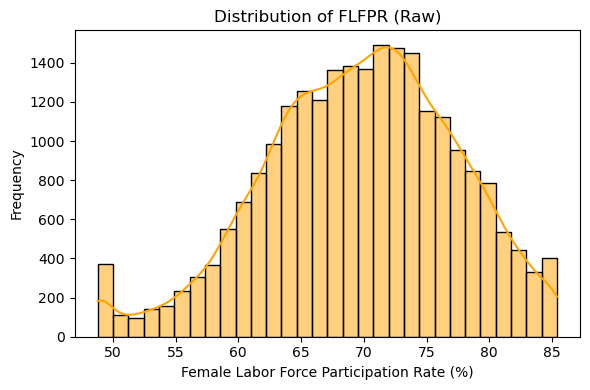

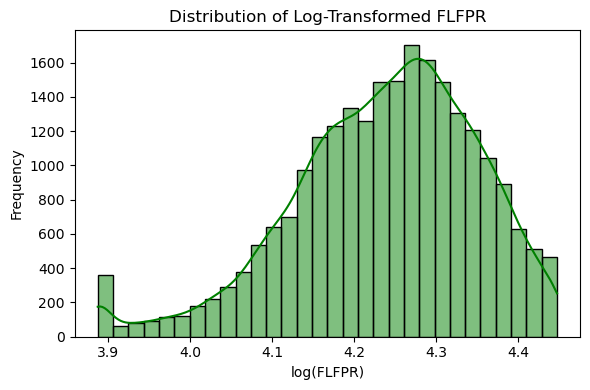

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Make sure your DataFrame is ready ===
# merged_data = pd.read_csv("your_cleaned_merged_data.csv")

# Clean data
df = merged_data.dropna(subset=["mc_infant", "flfpr_20to64", "study_year"]).copy()
df["log_flfpr"] = np.log(df["flfpr_20to64"])

# 1. Trend Plot: Average mc_infant by year
trend = df.groupby("study_year")["mc_infant"].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(data=trend, x="study_year", y="mc_infant", marker="o")
plt.title("Average Infant Care Cost Over Time (2008–2018)")
plt.xlabel("Year")
plt.ylabel("Avg Infant Care Cost ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Histogram of mc_infant
plt.figure(figsize=(6, 4))
sns.histplot(df["mc_infant"], bins=30, kde=True)
plt.title("Distribution of Infant Care Costs")
plt.xlabel("Monthly Infant Care Cost ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Histogram of FLFPR (raw)
plt.figure(figsize=(6, 4))
sns.histplot(df["flfpr_20to64"], bins=30, kde=True, color="orange")
plt.title("Distribution of FLFPR (Raw)")
plt.xlabel("Female Labor Force Participation Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Histogram of log(FLFPR)
plt.figure(figsize=(6, 4))
sns.histplot(df["log_flfpr"], bins=30, kde=True, color="green")
plt.title("Distribution of Log-Transformed FLFPR")
plt.xlabel("log(FLFPR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


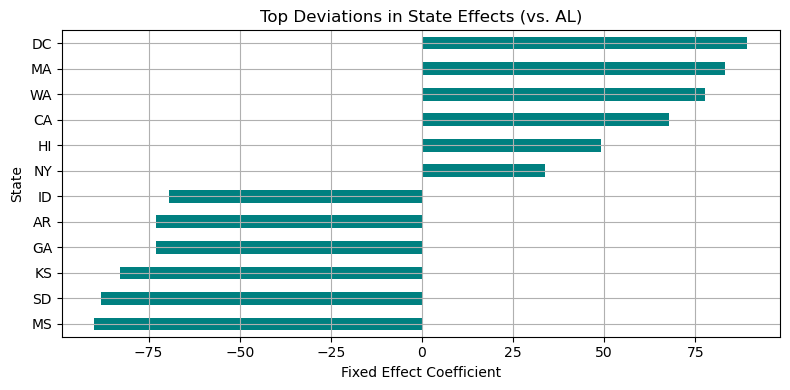

In [105]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Rerun regression with state dummies (baseline = AL)
model_state = smf.ols("mc_infant ~ mhi_2018 + log_flfpr + C(state_abbreviation) + C(study_year)", data=reg_df).fit()

# Extract and clean state effects
state_effects = model_state.params.filter(like="C(state_abbreviation)").sort_values()

# Top 10 positive & negative state effects
top_states = pd.concat([state_effects.head(6), state_effects.tail(6)])

# Clean index for display
top_states.index = top_states.index.str.extract(r'\[T\.(.+)\]')[0]

# Plot again
plt.figure(figsize=(8, 4))
top_states.plot(kind="barh", color="teal")
plt.title("Top Deviations in State Effects (vs. AL)")
plt.xlabel("Fixed Effect Coefficient")
plt.ylabel("State")
plt.grid(True)
plt.tight_layout()
plt.show()


In [111]:
pip install geodatasets

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



<Figure size 1200x600 with 0 Axes>

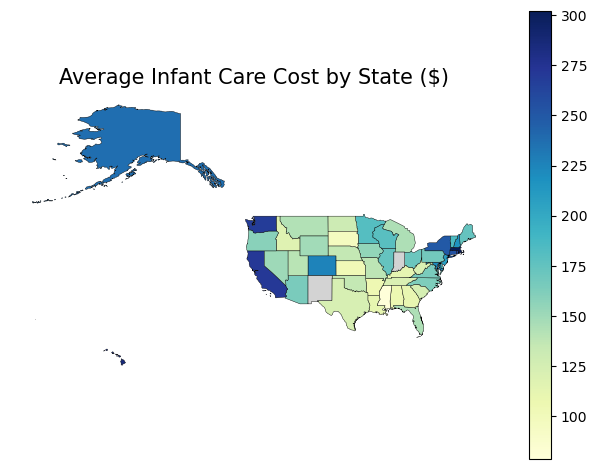

In [149]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create avg infant cost by state
map_data = merged_data.groupby("state_abbreviation")["mc_infant"].mean().reset_index()
map_data.columns = ["state_abbreviation", "avg_infant_cost"]

# Step 2: Load shapefile (ensure .shp, .shx, .dbf are all in the same folder)
shapefile_path = r"C:\Users\Sampreethi Bokka\Desktop\Spring 2025\Econometrics\Project\ne_50m_admin_1_states_provinces.shp"
us_states = gpd.read_file(shapefile_path)

# Step 3: Filter for U.S. states only
us_states = us_states[us_states['admin'] == 'United States of America']

# Step 4: Map state names to abbreviations
state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}
us_states["state_abbreviation"] = us_states["name"].map(state_abbrev)

# Step 5: Merge shapefile with your infant cost data
choropleth_data = us_states.merge(map_data, on="state_abbreviation", how="left")

# Step 6: Plot
plt.figure(figsize=(12, 6))
choropleth_data.plot(column="avg_infant_cost", cmap="YlGnBu", legend=True,
                     missing_kwds={"color": "lightgrey"},
                     edgecolor="black", linewidth=0.3)
plt.title("Average Infant Care Cost by State ($)", fontsize=15)
plt.axis("off")
plt.tight_layout()
plt.show()


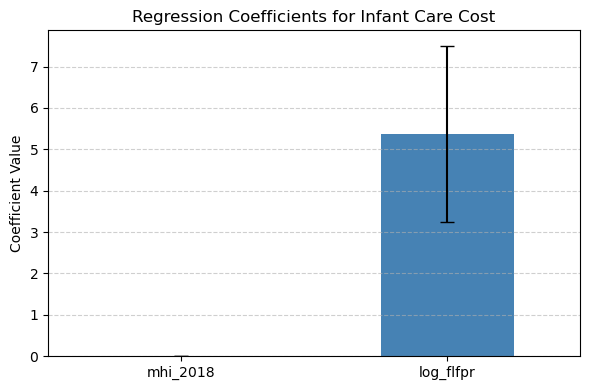

In [151]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Step 1: Log-transform FLFPR
merged_data["log_flfpr"] = np.log(merged_data["flfpr_20to64"])

# Step 2: Drop NA values
reg_df = merged_data.dropna(subset=["mc_infant", "mhi_2018", "log_flfpr", "state_name", "study_year"])

# Step 3: Fit fixed effects OLS model
model = smf.ols("mc_infant ~ mhi_2018 + log_flfpr + C(state_name) + C(study_year)", data=reg_df).fit(cov_type='HC3')

# Step 4: Plot coefficients of interest
coef = model.params[["mhi_2018", "log_flfpr"]]
err = model.bse[["mhi_2018", "log_flfpr"]]

plt.figure(figsize=(6, 4))
coef.plot(kind='bar', yerr=err, capsize=5, color='steelblue')
plt.title("Regression Coefficients for Infant Care Cost")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


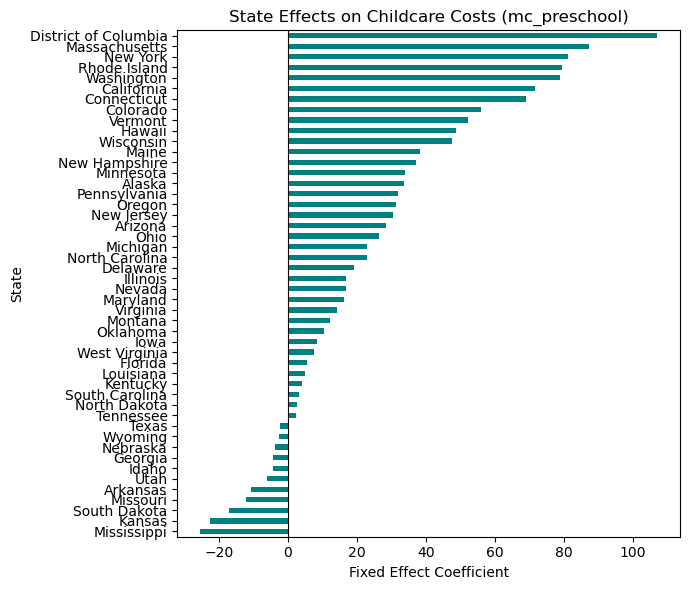

In [153]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Log-transform if not already done
merged_data["log_flfpr"] = np.log(merged_data["flfpr_20to64"])

# Prepare regression dataset
reg_df = merged_data.dropna(subset=["mc_preschool", "mhi_2018", "log_flfpr", "state_name", "study_year"])

# Run panel regression with state/year fixed effects
model = smf.ols("mc_preschool ~ mhi_2018 + log_flfpr + C(state_name) + C(study_year)", data=reg_df).fit(cov_type='HC3')

# Extract only state fixed effect coefficients
state_effects = model.params.filter(like="C(state_name)").sort_values()

# Clean up names to just state abbreviations
state_effects.index = state_effects.index.str.extract(r'C\(state_name\)\[T\.(.*)\]')[0]

# Plot top deviations
plt.figure(figsize=(7, 6))
state_effects.sort_values().plot(kind="barh", color="teal")
plt.axvline(0, color="black", linewidth=0.8)
plt.title("State Effects on Childcare Costs (mc_preschool)")
plt.xlabel("Fixed Effect Coefficient")
plt.ylabel("State")
plt.tight_layout()
plt.show()


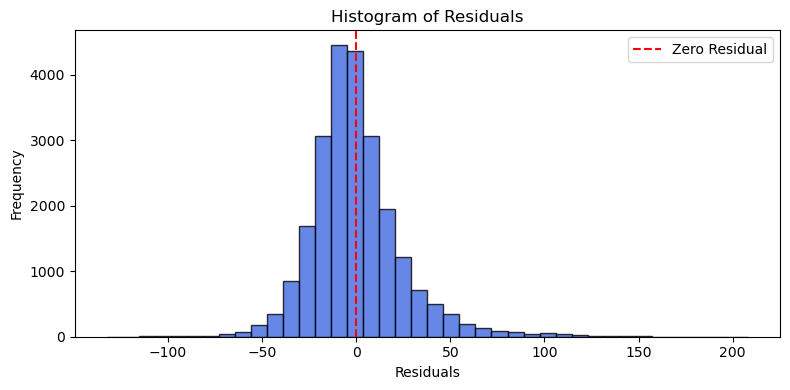

In [155]:
import matplotlib.pyplot as plt

# Calculate residuals from mc_infant model
residuals = y_true - y_pred

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=40, color='royalblue', edgecolor='black', alpha=0.8)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()
